# Unit 3 - Lesson 3 - Drill - Ridge vs. Lasso Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [4]:
print('Show parameter values without penalization (alpha/lambda equal to zero)')
# Small number of parameters.
lass = linear_model.Lasso(alpha=0)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=0)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

Show parameter values without penalization (alpha/lambda equal to zero)
R² for the model with few features:
0.573878496271703

Parameter estimates for the model with few features:
[ 1.36873063e-02 -7.59472350e-01  2.21504775e-05 -1.46121929e-03]

R² for the model with many features:
0.5739444483155421

Parameter estimates for the model with many features:
[-2.06111494e-03 -7.58818422e-01  6.04810006e-02 -3.53546655e-03
  9.26788633e-03 -3.79292001e-03  1.76197742e-01 -2.05761745e-04
 -9.11532536e-07  1.20391468e+00]


In [5]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=0.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=0.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


Checking predictive power using the test set:

In [6]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [7]:
# Your code here
ridge_scores = []
lasso_scores = []

for lambd in np.arange(0, 10, 0.01):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    print('Ridge lambda = ', lambd)
    ridge_score = ridgeregrBig.score(X_train2, Y_train)
    ridge_scores.append(ridge_score)
    print('R^2 for Ridge: ', ridge_score)

    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    print('Lasso lambda = ', lambd/100)
    lasso_score = lassBig.score(X_train2, Y_train)
    lasso_scores.append(lasso_score)
    print('R^2 for Ridge: ', lasso_score)
    print()

Ridge lambda =  0.0
R^2 for Ridge:  0.5739733101701104
Lasso lambda =  0.0
R^2 for Ridge:  0.5739444483155421

Ridge lambda =  0.01
R^2 for Ridge:  0.573972341344472
Lasso lambda =  0.0001
R^2 for Ridge:  0.5737681044618193

Ridge lambda =  0.02
R^2 for Ridge:  0.5739723388615039
Lasso lambda =  0.0002
R^2 for Ridge:  0.5733739342611162

Ridge lambda =  0.03
R^2 for Ridge:  0.5739723348300207
Lasso lambda =  0.0003
R^2 for Ridge:  0.5727518413871451

Ridge lambda =  0.04
R^2 for Ridge:  0.5739723292778088
Lasso lambda =  0.0004
R^2 for Ridge:  0.5720087276567742

Ridge lambda =  0.05
R^2 for Ridge:  0.5739723222458935
Lasso lambda =  0.0005
R^2 for Ridge:  0.5710532985531875

Ridge lambda =  0.06
R^2 for Ridge:  0.5739723137764927
Lasso lambda =  0.0006
R^2 for Ridge:  0.5698849880664936

Ridge lambda =  0.07
R^2 for Ridge:  0.5739723039111366
Lasso lambda =  0.0007000000000000001
R^2 for Ridge:  0.5685046614224027

Ridge lambda =  0.08
R^2 for Ridge:  0.5739722926905343
Lasso lambda =

Lasso lambda =  0.0077
R^2 for Ridge:  0.02683413480102037

Ridge lambda =  0.78
R^2 for Ridge:  0.5739696963763254
Lasso lambda =  0.0078000000000000005
R^2 for Ridge:  0.02683413478391361

Ridge lambda =  0.79
R^2 for Ridge:  0.5739696473098646
Lasso lambda =  0.0079
R^2 for Ridge:  0.02683413476658636

Ridge lambda =  0.8
R^2 for Ridge:  0.5739695981427568
Lasso lambda =  0.008
R^2 for Ridge:  0.026834134749037727

Ridge lambda =  0.81
R^2 for Ridge:  0.5739695488807982
Lasso lambda =  0.008100000000000001
R^2 for Ridge:  0.02683413473126894

Ridge lambda =  0.8200000000000001
R^2 for Ridge:  0.5739694995294217
Lasso lambda =  0.0082
R^2 for Ridge:  0.026834134713279226

Ridge lambda =  0.8300000000000001
R^2 for Ridge:  0.5739694500940227
Lasso lambda =  0.0083
R^2 for Ridge:  0.02683413469506879

Ridge lambda =  0.84
R^2 for Ridge:  0.5739694005797978
Lasso lambda =  0.0084
R^2 for Ridge:  0.02683413467663764

Ridge lambda =  0.85
R^2 for Ridge:  0.5739693509920454
Lasso lambda = 

Ridge lambda =  1.46
R^2 for Ridge:  0.5739663267134951
Lasso lambda =  0.0146
R^2 for Ridge:  0.026834133102816016

Ridge lambda =  1.47
R^2 for Ridge:  0.5739662786659572
Lasso lambda =  0.0147
R^2 for Ridge:  0.026834133070478657

Ridge lambda =  1.48
R^2 for Ridge:  0.5739662306988751
Lasso lambda =  0.0148
R^2 for Ridge:  0.026834133037920593

Ridge lambda =  1.49
R^2 for Ridge:  0.5739661828127907
Lasso lambda =  0.0149
R^2 for Ridge:  0.026834133005141703

Ridge lambda =  1.5
R^2 for Ridge:  0.5739661350087693
Lasso lambda =  0.015
R^2 for Ridge:  0.026834132972142214

Ridge lambda =  1.51
R^2 for Ridge:  0.5739660872875028
Lasso lambda =  0.0151
R^2 for Ridge:  0.026834132938922003

Ridge lambda =  1.52
R^2 for Ridge:  0.5739660396499908
Lasso lambda =  0.0152
R^2 for Ridge:  0.0268341329054812

Ridge lambda =  1.53
R^2 for Ridge:  0.5739659920965825
Lasso lambda =  0.015300000000000001
R^2 for Ridge:  0.026834132871819464

Ridge lambda =  1.54
R^2 for Ridge:  0.573965944628354

R^2 for Ridge:  0.5739632679982792
Lasso lambda =  0.021400000000000002
R^2 for Ridge:  0.026834130401051537

Ridge lambda =  2.15
R^2 for Ridge:  0.573963226367962
Lasso lambda =  0.0215
R^2 for Ridge:  0.02683413035370441

Ridge lambda =  2.16
R^2 for Ridge:  0.5739631848359192
Lasso lambda =  0.0216
R^2 for Ridge:  0.026834130306136576

Ridge lambda =  2.17
R^2 for Ridge:  0.5739631434022482
Lasso lambda =  0.0217
R^2 for Ridge:  0.02683413025834791

Ridge lambda =  2.18
R^2 for Ridge:  0.5739631020665656
Lasso lambda =  0.0218
R^2 for Ridge:  0.02683413021033865

Ridge lambda =  2.19
R^2 for Ridge:  0.5739630608289736
Lasso lambda =  0.0219
R^2 for Ridge:  0.026834130162108893

Ridge lambda =  2.2
R^2 for Ridge:  0.5739630196891649
Lasso lambda =  0.022000000000000002
R^2 for Ridge:  0.026834130113657872

Ridge lambda =  2.21
R^2 for Ridge:  0.5739629786473126
Lasso lambda =  0.022099999999999998
R^2 for Ridge:  0.02683413006498636

Ridge lambda =  2.22
R^2 for Ridge:  0.5739629377

Ridge lambda =  2.91
R^2 for Ridge:  0.5739603383790953
Lasso lambda =  0.0291
R^2 for Ridge:  0.02683412610946234

Ridge lambda =  2.92
R^2 for Ridge:  0.5739603038017728
Lasso lambda =  0.0292
R^2 for Ridge:  0.026834126045118704

Ridge lambda =  2.93
R^2 for Ridge:  0.5739602693072156
Lasso lambda =  0.029300000000000003
R^2 for Ridge:  0.02683412598055457

Ridge lambda =  2.94
R^2 for Ridge:  0.5739602348950525
Lasso lambda =  0.0294
R^2 for Ridge:  0.02683412591576972

Ridge lambda =  2.95
R^2 for Ridge:  0.5739602005651965
Lasso lambda =  0.029500000000000002
R^2 for Ridge:  0.026834125850764168

Ridge lambda =  2.96
R^2 for Ridge:  0.5739601663172549
Lasso lambda =  0.0296
R^2 for Ridge:  0.02683412578553757

Ridge lambda =  2.97
R^2 for Ridge:  0.5739601321509443
Lasso lambda =  0.0297
R^2 for Ridge:  0.02683412572009058

Ridge lambda =  2.98
R^2 for Ridge:  0.5739600980661805
Lasso lambda =  0.0298
R^2 for Ridge:  0.026834125654422673

Ridge lambda =  2.99
R^2 for Ridge:  0.57

Lasso lambda =  0.0359
R^2 for Ridge:  0.02683412123127704

Ridge lambda =  3.6
R^2 for Ridge:  0.5739581334047682
Lasso lambda =  0.036000000000000004
R^2 for Ridge:  0.02683412115192374

Ridge lambda =  3.61
R^2 for Ridge:  0.573958103947477
Lasso lambda =  0.0361
R^2 for Ridge:  0.026834121072349504

Ridge lambda =  3.62
R^2 for Ridge:  0.5739580745559523
Lasso lambda =  0.0362
R^2 for Ridge:  0.026834120992554996

Ridge lambda =  3.63
R^2 for Ridge:  0.573958045229948
Lasso lambda =  0.0363
R^2 for Ridge:  0.02683412091253923

Ridge lambda =  3.64
R^2 for Ridge:  0.573958015969193
Lasso lambda =  0.0364
R^2 for Ridge:  0.02683412083230308

Ridge lambda =  3.65
R^2 for Ridge:  0.573957986773453
Lasso lambda =  0.0365
R^2 for Ridge:  0.026834120751846324

Ridge lambda =  3.66
R^2 for Ridge:  0.5739579576424592
Lasso lambda =  0.0366
R^2 for Ridge:  0.026834120671168415

Ridge lambda =  3.67
R^2 for Ridge:  0.5739579285760754
Lasso lambda =  0.036699999999999997
R^2 for Ridge:  0.0268

Lasso lambda =  0.043
R^2 for Ridge:  0.02683411504867339

Ridge lambda =  4.3100000000000005
R^2 for Ridge:  0.5739561926509551
Lasso lambda =  0.043100000000000006
R^2 for Ridge:  0.026834114953648073

Ridge lambda =  4.32
R^2 for Ridge:  0.5739561673220817
Lasso lambda =  0.0432
R^2 for Ridge:  0.026834114858402147

Ridge lambda =  4.33
R^2 for Ridge:  0.5739561420441341
Lasso lambda =  0.0433
R^2 for Ridge:  0.026834114762935294

Ridge lambda =  4.34
R^2 for Ridge:  0.5739561168169323
Lasso lambda =  0.0434
R^2 for Ridge:  0.026834114667247718

Ridge lambda =  4.3500000000000005
R^2 for Ridge:  0.5739560916403832
Lasso lambda =  0.043500000000000004
R^2 for Ridge:  0.026834114571339773

Ridge lambda =  4.36
R^2 for Ridge:  0.5739560665141213
Lasso lambda =  0.0436
R^2 for Ridge:  0.026834114475210665

Ridge lambda =  4.37
R^2 for Ridge:  0.573956041438136
Lasso lambda =  0.0437
R^2 for Ridge:  0.026834114378861074

Ridge lambda =  4.38
R^2 for Ridge:  0.5739560164120285
Lasso lambd

Lasso lambda =  0.050600000000000006
R^2 for Ridge:  0.026834107197664325

Ridge lambda =  5.07
R^2 for Ridge:  0.5739544006903406
Lasso lambda =  0.0507
R^2 for Ridge:  0.026834107085863534

Ridge lambda =  5.08
R^2 for Ridge:  0.5739543787518889
Lasso lambda =  0.0508
R^2 for Ridge:  0.026834106973841813

Ridge lambda =  5.09
R^2 for Ridge:  0.5739543568522139
Lasso lambda =  0.0509
R^2 for Ridge:  0.026834106861599375

Ridge lambda =  5.1000000000000005
R^2 for Ridge:  0.5739543349910363
Lasso lambda =  0.051000000000000004
R^2 for Ridge:  0.026834106749136225

Ridge lambda =  5.11
R^2 for Ridge:  0.5739543131683679
Lasso lambda =  0.051100000000000007
R^2 for Ridge:  0.02683410663645225

Ridge lambda =  5.12
R^2 for Ridge:  0.5739542913839453
Lasso lambda =  0.0512
R^2 for Ridge:  0.026834106523547677

Ridge lambda =  5.13
R^2 for Ridge:  0.5739542696376194
Lasso lambda =  0.0513
R^2 for Ridge:  0.02683410641042228

Ridge lambda =  5.14
R^2 for Ridge:  0.573954247929376
Lasso lambd

R^2 for Ridge:  0.5739530101185413
Lasso lambda =  0.0574
R^2 for Ridge:  0.026834099092371444

Ridge lambda =  5.75
R^2 for Ridge:  0.5739529904898493
Lasso lambda =  0.0575
R^2 for Ridge:  0.02683409896556077

Ridge lambda =  5.76
R^2 for Ridge:  0.5739529708915964
Lasso lambda =  0.0576
R^2 for Ridge:  0.026834098838529274

Ridge lambda =  5.7700000000000005
R^2 for Ridge:  0.5739529513237385
Lasso lambda =  0.0577
R^2 for Ridge:  0.026834098711277062

Ridge lambda =  5.78
R^2 for Ridge:  0.5739529317861004
Lasso lambda =  0.057800000000000004
R^2 for Ridge:  0.026834098583804037

Ridge lambda =  5.79
R^2 for Ridge:  0.5739529122785985
Lasso lambda =  0.0579
R^2 for Ridge:  0.026834098456110397

Ridge lambda =  5.8
R^2 for Ridge:  0.5739528928012205
Lasso lambda =  0.057999999999999996
R^2 for Ridge:  0.026834098328196054

Ridge lambda =  5.8100000000000005
R^2 for Ridge:  0.5739528733536836
Lasso lambda =  0.058100000000000006
R^2 for Ridge:  0.026834098200060993

Ridge lambda =  5

R^2 for Ridge:  0.026834089966412233

Ridge lambda =  6.43
R^2 for Ridge:  0.5739517219051158
Lasso lambda =  0.0643
R^2 for Ridge:  0.02683408982459168

Ridge lambda =  6.44
R^2 for Ridge:  0.5739517041458455
Lasso lambda =  0.0644
R^2 for Ridge:  0.026834089682550407

Ridge lambda =  6.45
R^2 for Ridge:  0.573951686410435
Lasso lambda =  0.0645
R^2 for Ridge:  0.026834089540288427

Ridge lambda =  6.46
R^2 for Ridge:  0.5739516686989103
Lasso lambda =  0.0646
R^2 for Ridge:  0.026834089397805627

Ridge lambda =  6.47
R^2 for Ridge:  0.5739516510110916
Lasso lambda =  0.0647
R^2 for Ridge:  0.02683408925510211

Ridge lambda =  6.48
R^2 for Ridge:  0.573951633346913
Lasso lambda =  0.06480000000000001
R^2 for Ridge:  0.026834089112178106

Ridge lambda =  6.49
R^2 for Ridge:  0.5739516157063013
Lasso lambda =  0.0649
R^2 for Ridge:  0.026834088969032943

Ridge lambda =  6.5
R^2 for Ridge:  0.5739515980892642
Lasso lambda =  0.065
R^2 for Ridge:  0.02683408882566718

Ridge lambda =  6.51

R^2 for Ridge:  0.02683407871733845

Ridge lambda =  7.18
R^2 for Ridge:  0.5739504510060647
Lasso lambda =  0.0718
R^2 for Ridge:  0.026834078558963134

Ridge lambda =  7.19
R^2 for Ridge:  0.5739504348271272
Lasso lambda =  0.0719
R^2 for Ridge:  0.026834078400366782

Ridge lambda =  7.2
R^2 for Ridge:  0.5739504186665677
Lasso lambda =  0.07200000000000001
R^2 for Ridge:  0.026834078241549934

Ridge lambda =  7.21
R^2 for Ridge:  0.573950402524392
Lasso lambda =  0.0721
R^2 for Ridge:  0.026834078082512255

Ridge lambda =  7.22
R^2 for Ridge:  0.5739503864005439
Lasso lambda =  0.0722
R^2 for Ridge:  0.02683407792325387

Ridge lambda =  7.23
R^2 for Ridge:  0.5739503702948711
Lasso lambda =  0.0723
R^2 for Ridge:  0.02683407776377456

Ridge lambda =  7.24
R^2 for Ridge:  0.5739503542073509
Lasso lambda =  0.0724
R^2 for Ridge:  0.026834077604074635

Ridge lambda =  7.25
R^2 for Ridge:  0.573950338137958
Lasso lambda =  0.0725
R^2 for Ridge:  0.02683407744415434

Ridge lambda =  7.26

R^2 for Ridge:  0.026834067444977624

Ridge lambda =  7.86
R^2 for Ridge:  0.573949389760088
Lasso lambda =  0.0786
R^2 for Ridge:  0.02683406727159221

Ridge lambda =  7.87
R^2 for Ridge:  0.5739493746984826
Lasso lambda =  0.0787
R^2 for Ridge:  0.02683406709798619

Ridge lambda =  7.88
R^2 for Ridge:  0.573949359651408
Lasso lambda =  0.0788
R^2 for Ridge:  0.02683406692415957

Ridge lambda =  7.890000000000001
R^2 for Ridge:  0.5739493446187865
Lasso lambda =  0.07890000000000001
R^2 for Ridge:  0.02683406675011213

Ridge lambda =  7.9
R^2 for Ridge:  0.5739493296006328
Lasso lambda =  0.079
R^2 for Ridge:  0.026834066575844084

Ridge lambda =  7.91
R^2 for Ridge:  0.5739493145968736
Lasso lambda =  0.0791
R^2 for Ridge:  0.026834066401354884

Ridge lambda =  7.92
R^2 for Ridge:  0.5739492996074413
Lasso lambda =  0.07919999999999999
R^2 for Ridge:  0.026834066226645303

Ridge lambda =  7.930000000000001
R^2 for Ridge:  0.5739492846323044
Lasso lambda =  0.07930000000000001
R^2 for

Lasso lambda =  0.08529999999999999
R^2 for Ridge:  0.02683405515195025

Ridge lambda =  8.540000000000001
R^2 for Ridge:  0.5739483962969613
Lasso lambda =  0.0854
R^2 for Ridge:  0.02683405496355506

Ridge lambda =  8.55
R^2 for Ridge:  0.5739483821171409
Lasso lambda =  0.0855
R^2 for Ridge:  0.02683405477493939

Ridge lambda =  8.56
R^2 for Ridge:  0.5739483679487887
Lasso lambda =  0.08560000000000001
R^2 for Ridge:  0.026834054586102662

Ridge lambda =  8.57
R^2 for Ridge:  0.5739483537918286
Lasso lambda =  0.0857
R^2 for Ridge:  0.026834054397045337

Ridge lambda =  8.58
R^2 for Ridge:  0.5739483396462752
Lasso lambda =  0.0858
R^2 for Ridge:  0.02683405420776741

Ridge lambda =  8.59
R^2 for Ridge:  0.5739483255120482
Lasso lambda =  0.0859
R^2 for Ridge:  0.02683405401826877

Ridge lambda =  8.6
R^2 for Ridge:  0.5739483113891384
Lasso lambda =  0.086
R^2 for Ridge:  0.02683405382854942

Ridge lambda =  8.61
R^2 for Ridge:  0.5739482972775163
Lasso lambda =  0.0861
R^2 for Ri

Ridge lambda =  9.25
R^2 for Ridge:  0.5739474158237877
Lasso lambda =  0.0925
R^2 for Ridge:  0.02683404102331244

Ridge lambda =  9.26
R^2 for Ridge:  0.5739474023643365
Lasso lambda =  0.0926
R^2 for Ridge:  0.026834040819024633

Ridge lambda =  9.27
R^2 for Ridge:  0.5739473889137618
Lasso lambda =  0.09269999999999999
R^2 for Ridge:  0.026834040614515994

Ridge lambda =  9.28
R^2 for Ridge:  0.5739473754720605
Lasso lambda =  0.0928
R^2 for Ridge:  0.026834040409786764

Ridge lambda =  9.290000000000001
R^2 for Ridge:  0.5739473620391808
Lasso lambda =  0.09290000000000001
R^2 for Ridge:  0.026834040204836707

Ridge lambda =  9.3
R^2 for Ridge:  0.573947348615084
Lasso lambda =  0.09300000000000001
R^2 for Ridge:  0.02683403999966616

Ridge lambda =  9.31
R^2 for Ridge:  0.5739473351997513
Lasso lambda =  0.0931
R^2 for Ridge:  0.02683403979427446

Ridge lambda =  9.32
R^2 for Ridge:  0.5739473217931348
Lasso lambda =  0.0932
R^2 for Ridge:  0.026834039588662154

Ridge lambda =  9

R^2 for Ridge:  0.573946532216538
Lasso lambda =  0.0992
R^2 for Ridge:  0.02683402684798952

Ridge lambda =  9.93
R^2 for Ridge:  0.5739465192855726
Lasso lambda =  0.0993
R^2 for Ridge:  0.026834026628912763

Ridge lambda =  9.94
R^2 for Ridge:  0.573946506361532
Lasso lambda =  0.09939999999999999
R^2 for Ridge:  0.02683402640961508

Ridge lambda =  9.950000000000001
R^2 for Ridge:  0.5739464934444005
Lasso lambda =  0.0995
R^2 for Ridge:  0.02683402619009667

Ridge lambda =  9.96
R^2 for Ridge:  0.5739464805341549
Lasso lambda =  0.09960000000000001
R^2 for Ridge:  0.026834025970357552

Ridge lambda =  9.97
R^2 for Ridge:  0.5739464676307777
Lasso lambda =  0.09970000000000001
R^2 for Ridge:  0.026834025750397835

Ridge lambda =  9.98
R^2 for Ridge:  0.5739464547341662
Lasso lambda =  0.0998
R^2 for Ridge:  0.026834025530217187

Ridge lambda =  9.99
R^2 for Ridge:  0.5739464418444078
Lasso lambda =  0.0999
R^2 for Ridge:  0.026834025309815934



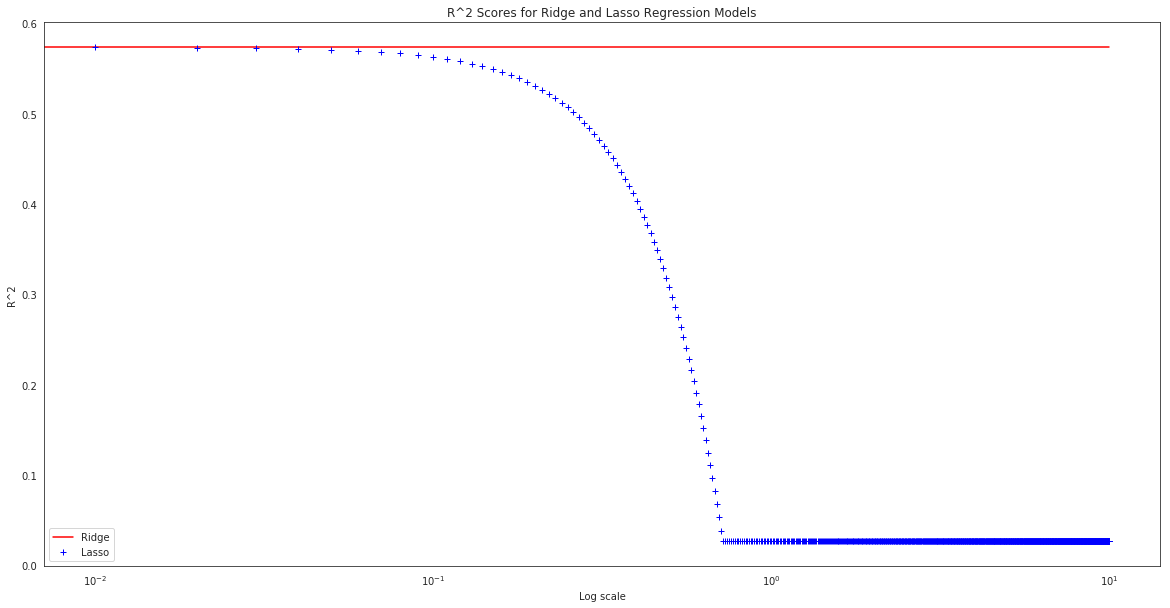

In [8]:
plt.figure(figsize=(20,10))
plt.semilogx(np.arange(0, 10, 0.01), ridge_scores, 'r-', label='Ridge')
plt.semilogx(np.arange(0, 10, 0.01), lasso_scores, 'b+',  label='Lasso')

plt.title('R^2 Scores for Ridge and Lasso Regression Models')
plt.xlabel('Log scale')
plt.ylabel('R^2')

plt.legend()
plt.show()

# Summary

Lasso and ridge regression are both clear improvements on OLS regression.  Ridge regression is an excellent tool to use with correlated features, while lasso is an efficient method of feature selection when dealing with an unmanageably large feature space. 